In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow_datasets as tfds

#from tfds.image_classification import omniglot

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from time import time
from keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

mnist_train, mnist_val, mnist_test = tfds.load(name="binary_alpha_digits", split=['train[:70%]','train[70%:85%]','train[85%:]'], batch_size=-1 )

mnist_train = tfds.as_numpy(mnist_train) 
mnist_val = tfds.as_numpy(mnist_val)
mnist_test = tfds.as_numpy(mnist_test)

X_train, y_train = mnist_train["image"], mnist_train["label"] # separating x and y
X_val, y_val = mnist_val["image"], mnist_val["label"]
X_test, y_test = mnist_test["image"], mnist_test["label"]


from tensorflow.keras.utils import to_categorical
X_train = X_train.reshape(X_train.shape[0], 20, 16, 1)
X_val = X_val.reshape(X_val.shape[0], 20, 16, 1)
X_test = X_test.reshape(X_test.shape[0], 20, 16, 1)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

Model 1
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 18, 14, 64)        640       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 9, 7, 64)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 4032)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 36)                145188    
Total params: 145,828
Trainable params: 145,828
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] - 1s 19ms/step - loss: 3.0529 - accuracy: 0.2858 - val_loss: 2.0752 - val_accuracy: 0.6571
Epoch 2/10
22/22 [==============================] - 0s 14ms/step - loss: 1.5922 - accuracy: 0.63

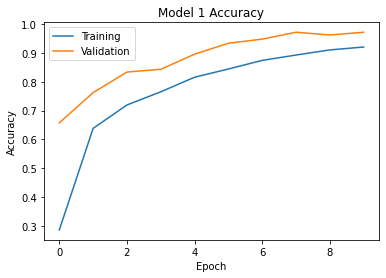

Model 2
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 18, 14, 64)        640       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 9, 7, 64)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 4032)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 36)                145188    
Total params: 145,828
Trainable params: 145,828
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] - 1s 21ms/step - loss: 3.1722 - accuracy: 0.2687 - val_loss: 2.2845 - val_accuracy: 0.6952
Epoch 2/10
22/22 [==============================] - 0s 15ms/step - loss: 1.7446 - accuracy: 0.65

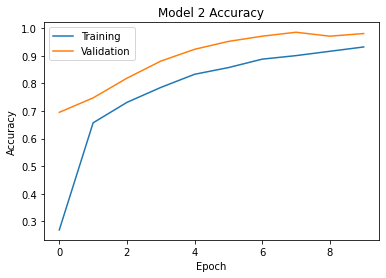

Model 3
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 18, 14, 64)        640       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 9, 7, 64)          0         
_________________________________________________________________
module_wrapper_24 (ModuleWra (None, 9, 7, 64)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 4032)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 36)                145188    
Total params: 145,828
Trainable params: 145,828
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] - 1s 22ms/step - loss: 3.1305 - accuracy: 0.2623 - val_

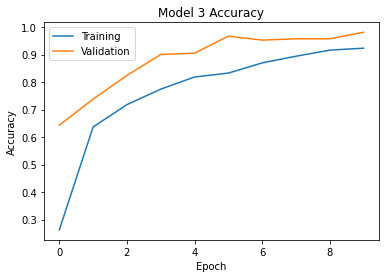

Model 4
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 18, 14, 64)        640       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 9, 7, 64)          0         
_________________________________________________________________
module_wrapper_25 (ModuleWra (None, 9, 7, 64)          256       
_________________________________________________________________
flatten_31 (Flatten)         (None, 4032)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 36)                145188    
Total params: 146,084
Trainable params: 145,956
Non-trainable params: 128
_________________________________________________________________
Epoch 1/10
22/22 [==============================] - 1s 22ms/step - loss: 1.7365 - accuracy: 0.5253 - va

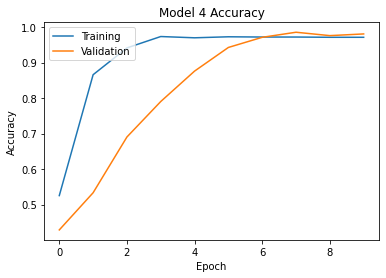

In [30]:
#One conv layer
spot = [1,2,3,4]
#1 = Base
#2 = Regularizer
#3 = Dropout
#4 = Batch normalization

#print(X_train)
#print(y_train)

for i in range(len(spot)):
  model = Sequential()

  # Add conv layer
  if spot[i] == 1 or spot[i] == 3 or spot[i] == 4:
    model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (20, 16, 1)))
  
  # L2
  elif spot[i] == 2:
    model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (20, 16, 1), kernel_regularizer = regularizers.l2(0.00001)))

  # Pooling layer added
  model.add(MaxPooling2D(pool_size= (2,2)))

  # Dropout
  if spot[i] == 3:
    model.add(Dropout(0.1))

  # Batch normalization
  elif spot[i] == 4:
    model.add(BatchNormalization())

  # Input flattened
  model.add(Flatten())

  # Regular FC layer
  model.add(Dense(36, activation = "softmax"))

  # Printing model summary to view parameters and shape
  print(f"Model {spot[i]}")
  model.summary()

  model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
  start = time()
  trained_model_base = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data = (X_val, y_val))
  print(f"Time elapsed: {(time()-start)/60}")

  plt.plot(trained_model_base.history['accuracy'])
  plt.plot(trained_model_base.history['val_accuracy'])
  plt.title(f'Model {spot[i]} Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.show()

Model 1
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 18, 14, 64)        640       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 9, 7, 64)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 4, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 2, 1, 32)          0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 36)                2340      
Total params: 21,444
Trainable params: 21,444
Non-trainable params: 0
_________________________________________

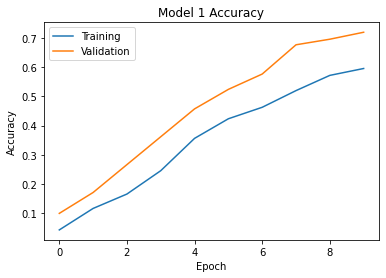

Model 2
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 18, 14, 64)        640       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 9, 7, 64)          0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 4, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 2, 1, 32)          0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 36)                2340      
Total params: 21,444
Trainable params: 21,444
Non-trainable params: 0
_________________________________________

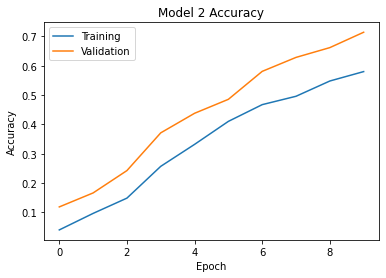

Model 3
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 18, 14, 64)        640       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 9, 7, 64)          0         
_________________________________________________________________
module_wrapper_26 (ModuleWra (None, 9, 7, 64)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 4, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 2, 1, 32)          0         
_________________________________________________________________
module_wrapper_27 (ModuleWra (None, 2, 1, 32)          0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 64)      

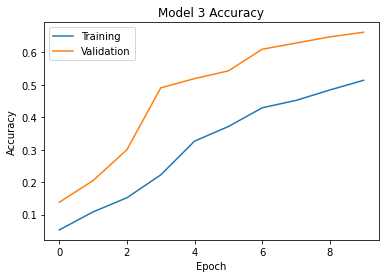

Model 4
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 18, 14, 64)        640       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 9, 7, 64)          0         
_________________________________________________________________
module_wrapper_28 (ModuleWra (None, 9, 7, 64)          256       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 4, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 2, 1, 32)          0         
_________________________________________________________________
module_wrapper_29 (ModuleWra (None, 2, 1, 32)          128       
_________________________________________________________________
flatten_35 (Flatten)         (None, 64)      

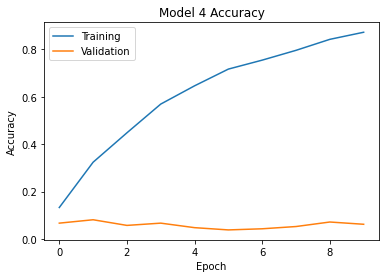

In [31]:
#Two conv layers
spot = [1,2,3,4]
#1 = Base
#2 = Regularizer
#3 = Dropout
#4 = BatchNormalization
for i in range(len(spot)):
  model = Sequential()

  # Add conv layer
  if spot[i] == 1 or spot[i] == 3 or spot[i] == 4:
    model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (20, 16, 1)))
  # L2
  elif spot[i] == 2:
    model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (20, 16, 1), kernel_regularizer = regularizers.l2(0.00001)))

  # Add a pooling layer
  model.add(MaxPooling2D(pool_size= (2,2)))
  # Drop
  if spot[i] == 3:
    model.add(Dropout(0.1))
  # BatchNorm
  elif spot[i] == 4:
    model.add(BatchNormalization())

  # Add a second conv layer with 2x2 stride
  if spot[i] == 1 or spot[i] == 3 or spot[i] == 4:
    model.add(Conv2D(32, kernel_size = 3, activation = "relu", strides = (2,2)))
  # L2
  elif spot[i] == 2:
    model.add(Conv2D(32, kernel_size = 3, activation = "relu", strides = (2,2), kernel_regularizer = regularizers.l2(0.00001)))


  # Add a pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))
  # Drop
  if spot[i] == 3:
    model.add(Dropout(0.1))
  # BatchNorm
  elif spot[i] == 4:
    model.add(BatchNormalization())

  # Flatten the input
  model.add(Flatten())

  # Regular FC layer
  model.add(Dense(36, activation = "softmax"))


  # Model summary printed to view shape and parameters
  print(f"Model {spot[i]}")
  model.summary()

  model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
  start = time()
  trained_model_base = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data = (X_val, y_val))
  print(f"Time elapsed: {(time()-start)/60}")

  plt.plot(trained_model_base.history['accuracy'])
  plt.plot(trained_model_base.history['val_accuracy'])
  plt.title(f'Model {spot[i]} Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.show()

In [32]:
# Test the best model: Base (1 convolutional layer)

X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

model = Sequential()

# Conv
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (20, 16, 1)))

# Pooling layer added
model.add(MaxPooling2D(pool_size = (2,2)))

# Input flattened
model.add(Flatten())

# Regular FC layer
# L2
model.add(Dense(36, activation = "softmax", kernel_regularizer = regularizers.l2(0.00001)))

# Printing model summary to view shape and parameters
model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
start = time()
trained_model_base = model.fit(X_train, y_train, epochs = 10, batch_size = 64)
print(f"Time elapsed: {(time()-start)/60}")
print("Score")
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 18, 14, 64)        640       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 9, 7, 64)          0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 4032)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 36)                145188    
Total params: 145,828
Trainable params: 145,828
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
26/26 [==============================] - 1s 13ms/step - loss: 2.9562 - accuracy: 0.3218
Epoch 2/10
26/26 [==============================] - 0s 14ms/step - loss: 1.4078 - accuracy: 0.6776
Epoch 3/10
26/26 [=============================

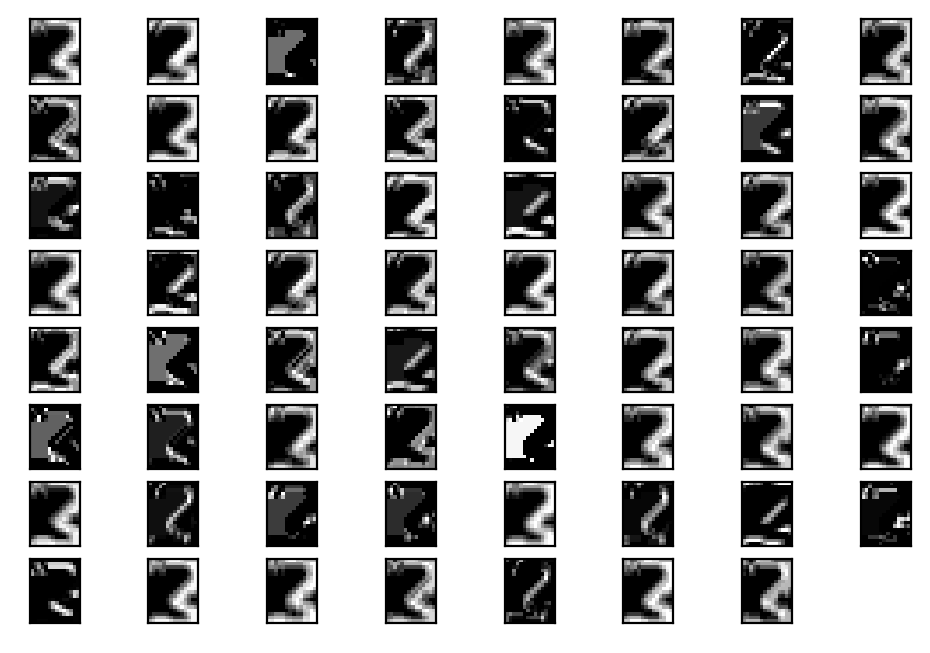

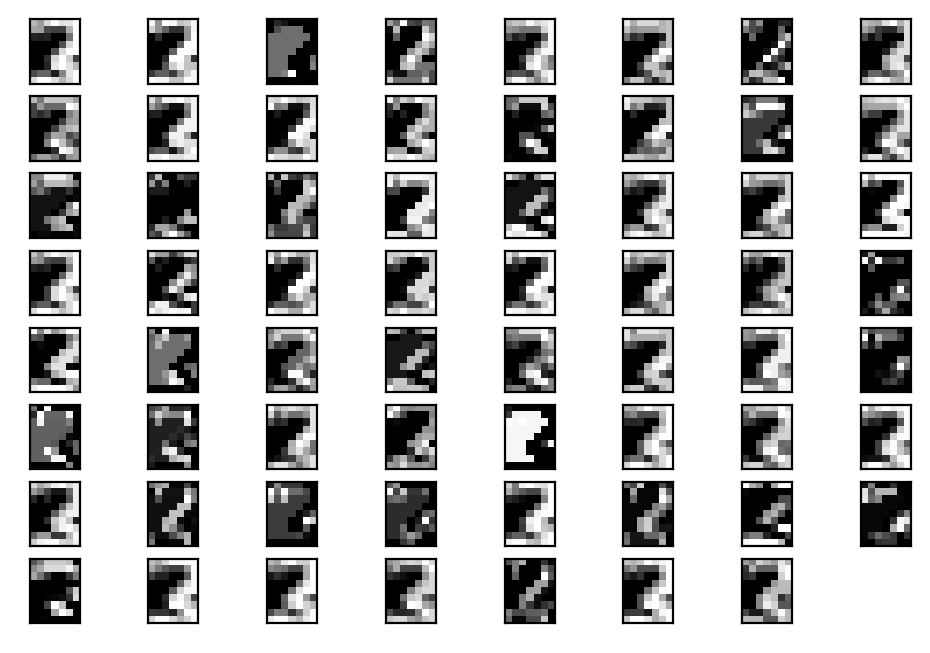

In [33]:
# Part Two
#Visualize convolutional filters
def Visualize(model,layers):
  model = Sequential(layers= model.layers[:layers+1])
  feat_maps = model.predict(X_test)

  square = 8
  ix = 1
  plt.figure(dpi = 200)
  for _ in range(square):
    for _ in range(square):
      if ix >= feat_maps.shape[3]:
        break
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(feat_maps[0, :, : ,ix-1], cmap = "gray")
      ix+=1

  plt.show()

Visualize(model,0)
print()
Visualize(model,1)
print()